<a href="https://colab.research.google.com/github/JairAlbertoHuertaDiaz45/Simulaci-n-II/blob/main/MB_refinamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movimiento Browniano**

In [2]:
import random as rd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def brownian_path(T=1, L=500):
    dt = T / L
    increments = np.sqrt(dt) * np.random.randn(L)
    W = np.cumsum(np.insert(increments, 0, 0))
    return W

In [4]:
def refine_brownian(W, T=1):
    L = len(W)
    dt = T / (L - 1)

    W_ref = np.zeros(2 * L - 1)
    W_ref[0::2] = W  # mantiene los puntos originales

    for i in range(L - 1):
        xi = np.random.randn()
        W_ref[2*i + 1] = 0.5 * (W[i] + W[i+1]) + 0.5 * np.sqrt(dt) * xi

    return W_ref

**1 trayectoria**

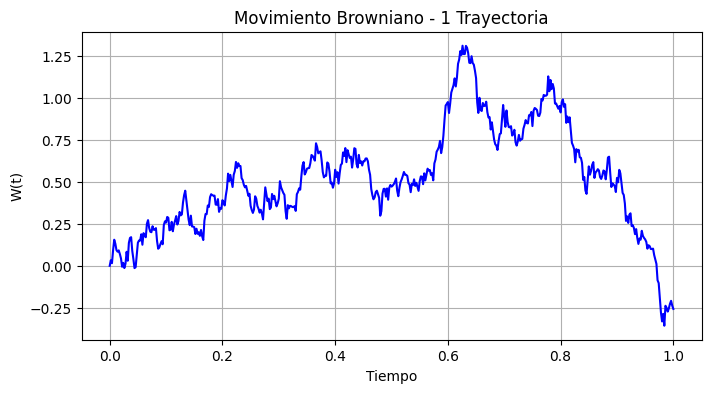

In [5]:
T = 1
L = 500

W = brownian_path(T, L)
t = np.linspace(0, T, len(W))

plt.figure(figsize=(8, 4))
plt.plot(t, W, color="blue")
plt.title("Movimiento Browniano - 1 Trayectoria")
plt.xlabel("Tiempo")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()

**Varias trayectorias**

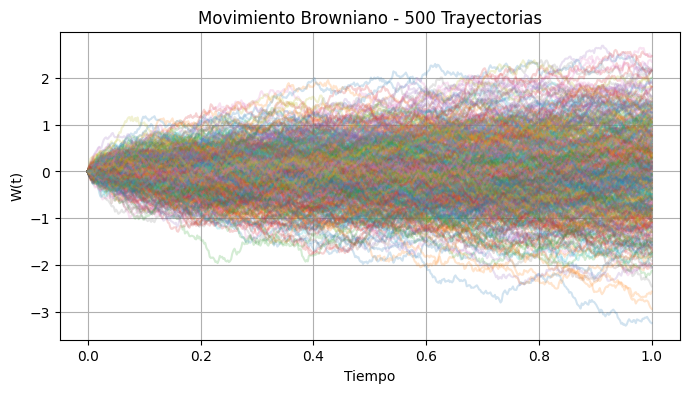

In [6]:
N = 500
plt.figure(figsize=(8, 4))

for _ in range(N):
    W = brownian_path(T, L)
    plt.plot(t, W, alpha=0.2)

plt.title("Movimiento Browniano - 500 Trayectorias")
plt.xlabel("Tiempo")
plt.ylabel("W(t)")
plt.grid(True)
plt.show()

**Refinamiento**

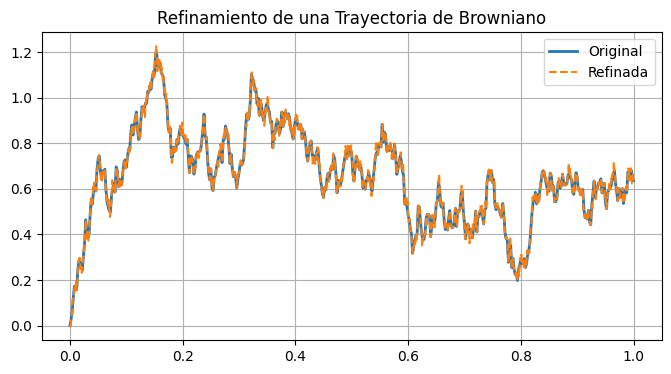

In [8]:
W = brownian_path(T, L)
W_ref = refine_brownian(W, T)

t_ref = np.linspace(0, T, len(W_ref))

plt.figure(figsize=(8, 4))
plt.plot(t, W, label="Original", linewidth=2)
plt.plot(t_ref, W_ref, label="Refinada", linestyle="--")
plt.title("Refinamiento de una Trayectoria de Browniano")
plt.grid(True)
plt.legend()
plt.show()
